In [1]:
import pandas as pd
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import validation_curve
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import ShuffleSplit
from sklearn import model_selection
from sklearn.grid_search import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn import preprocessing

/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [25]:
df1=pd.read_csv('../Data/Features/201711092033_features.csv').dropna()

In [26]:
df2=pd.read_csv('../Data/Features/201711091951_features.csv').dropna()

In [27]:
df3=pd.read_csv('../Data/Features/201711161638_features.csv').dropna()

In [28]:
df4=pd.read_csv('../Data/Features/201711182141_features.csv').dropna()

#### Model Selection

In [7]:
def compareClf(X,Y):
    # prepare configuration for cross validation test harness
    seed = 1234
    # prepare models
    models = []
    models.append(('LR', OneVsRestClassifier(LogisticRegression())))
    models.append(('NB', OneVsRestClassifier(GaussianNB())))
    models.append(('LDA', OneVsRestClassifier(LinearDiscriminantAnalysis())))
    models.append(('KNN', OneVsRestClassifier(KNeighborsClassifier())))
    
    # evaluate each model in turn
    results = []
    names = []
    scoring = 'accuracy'
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f) \n" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    # boxplot algorithm comparison
    fig = plt.figure()
    #fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()
    return models, results

In [8]:
def normalize(df):
    x = df.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df = pd.DataFrame(x_scaled,columns=df.columns)
    return df

In [23]:
def getScores(df):
    x=df[[u'lastAccelerometerValues[0]_mean_D',
       u'lastAccelerometerValues[1]_mean_D', u'lastAccelerometerValues[2]_mean_D',
       u'lastAccelerometerValues[0]_var_D', u'lastAccelerometerValues[1]_var_D',
       u'lastAccelerometerValues[2]_var_D', u'lastAccelerometerValues[0]_skew_D',
       u'lastAccelerometerValues[1]_skew_D', u'lastAccelerometerValues[2]_skew_D',
       u'lastAccelerometerValues[0]_kurtosis_D',
       u'lastAccelerometerValues[1]_kurtosis_D',
       u'lastAccelerometerValues[2]_kurtosis_D', u'lastGyroscopeValues[0]_mean_D',
       u'lastGyroscopeValues[1]_mean_D', u'lastGyroscopeValues[2]_mean_D',
       u'lastGyroscopeValues[0]_var_D', u'lastGyroscopeValues[1]_var_D',
       u'lastGyroscopeValues[2]_var_D', u'lastGyroscopeValues[0]_skew_D',
       u'lastGyroscopeValues[1]_skew_D', u'lastGyroscopeValues[2]_skew_D',
       u'lastGyroscopeValues[0]_kurtosis_D', u'lastGyroscopeValues[1]_kurtosis_D',
       u'lastGyroscopeValues[2]_kurtosis_D', u'lastMagnetometerValues[0]_mean_D',
       u'lastMagnetometerValues[1]_mean_D', u'lastMagnetometerValues[2]_mean_D',
       u'lastMagnetometerValues[0]_var_D', u'lastMagnetometerValues[1]_var_D',
       u'lastMagnetometerValues[2]_var_D', u'lastMagnetometerValues[0]_skew_D',
       u'lastMagnetometerValues[1]_skew_D', u'lastMagnetometerValues[2]_skew_D',
       u'lastMagnetometerValues[0]_kurtosis_D',
       u'lastMagnetometerValues[1]_kurtosis_D',
       u'lastMagnetometerValues[2]_kurtosis_D',
         u'lastAccelerometerValues[0]_mean_U',
       u'lastAccelerometerValues[1]_mean_U', u'lastAccelerometerValues[2]_mean_U',
       u'lastAccelerometerValues[0]_var_U', u'lastAccelerometerValues[1]_var_U',
       u'lastAccelerometerValues[2]_var_U', u'lastAccelerometerValues[0]_skew_U',
       u'lastAccelerometerValues[1]_skew_U', u'lastAccelerometerValues[2]_skew_U',
       u'lastAccelerometerValues[0]_kurtosis_U',
       u'lastAccelerometerValues[1]_kurtosis_U',
       u'lastAccelerometerValues[2]_kurtosis_U', u'lastGyroscopeValues[0]_mean_U',
       u'lastGyroscopeValues[1]_mean_U', u'lastGyroscopeValues[2]_mean_U',
       u'lastGyroscopeValues[0]_var_U', u'lastGyroscopeValues[1]_var_U',
       u'lastGyroscopeValues[2]_var_U', u'lastGyroscopeValues[0]_skew_U',
       u'lastGyroscopeValues[1]_skew_U', u'lastGyroscopeValues[2]_skew_U',
       u'lastGyroscopeValues[0]_kurtosis_U', u'lastGyroscopeValues[1]_kurtosis_U',
       u'lastGyroscopeValues[2]_kurtosis_U', u'lastMagnetometerValues[0]_mean_U',
       u'lastMagnetometerValues[1]_mean_U', u'lastMagnetometerValues[2]_mean_U',
       u'lastMagnetometerValues[0]_var_U', u'lastMagnetometerValues[1]_var_U',
       u'lastMagnetometerValues[2]_var_U', u'lastMagnetometerValues[0]_skew_U',
       u'lastMagnetometerValues[1]_skew_U', u'lastMagnetometerValues[2]_skew_U',
       u'lastMagnetometerValues[0]_kurtosis_U',
       u'lastMagnetometerValues[1]_kurtosis_U',
       u'lastMagnetometerValues[2]_kurtosis_U']]
    y=df[['target']]
    return compareClf(normalize(x),y)

In [49]:
df=df1.append(df2).append(df3).append(df4)

LR: 0.009091 (0.027273) 

NB: 0.009091 (0.027273) 

LDA: 0.000000 (0.000000) 

KNN: 0.000000 (0.000000) 



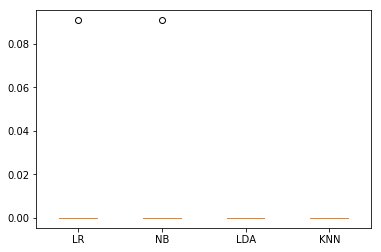

In [33]:
res1, mod1=getScores(df1)

LR: 0.000000 (0.000000) 

NB: 0.000000 (0.000000) 

LDA: 0.000000 (0.000000) 

KNN: 0.000000 (0.000000) 



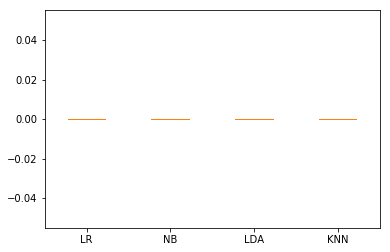

In [34]:
res2, mod2=getScores(df2)

LR: 0.007407 (0.022222) 

NB: 0.011111 (0.023715) 

LDA: 0.022365 (0.034010) 

KNN: 0.011111 (0.023715) 



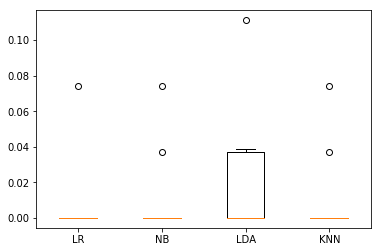

In [35]:
res3, mod3=getScores(df3)

LR: 0.007407 (0.022222) 

NB: 0.011111 (0.023715) 

LDA: 0.022365 (0.034010) 

KNN: 0.011111 (0.023715) 



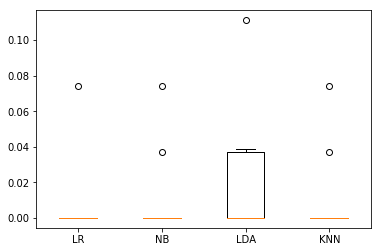

In [36]:
res4, mod4=getScores(df3)

LR: 0.004624 (0.007689) 

NB: 0.009289 (0.024279) 

LDA: 0.008113 (0.010456) 

KNN: 0.005801 (0.010713) 



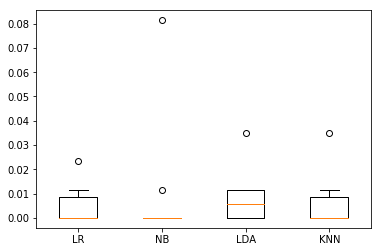

In [37]:
res, mod  = getScores(df)

In [ ]:
Top Bottom

LR: 0.773831 (0.188896) 

NB: 0.544868 (0.228593) 

LDA: 0.799479 (0.170032) 

KNN: 0.633480 (0.230337) 



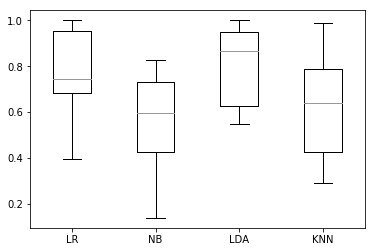

In [43]:
res, mod  = getScores(df)

In [46]:
df[['target']]=df[['target']].applymap(lambda x:x//36)

LR: 0.151778 (0.111377) 

NB: 0.247020 (0.238548) 

LDA: 0.227412 (0.135845) 

KNN: 0.138078 (0.105497) 



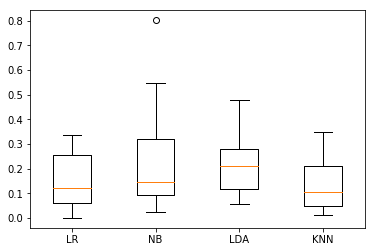

In [48]:
res, mod  = getScores(df)

LR: 0.036929 (0.046524) 

NB: 0.075247 (0.051057) 

LDA: 0.060184 (0.051054) 

KNN: 0.043986 (0.043345) 



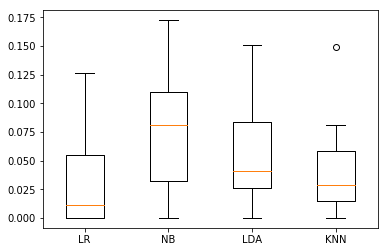

In [51]:
res, mod  = getScores(df)

In [52]:
df=df1.append(df2).append(df3).append(df4)

LR: 0.023082 (0.032174) 

NB: 0.019687 (0.025933) 

LDA: 0.031208 (0.031348) 

KNN: 0.027787 (0.025847) 



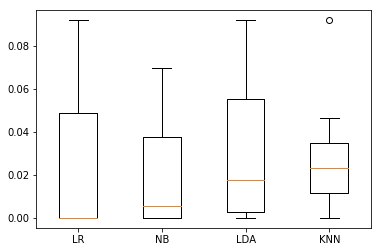

In [54]:
res, mod  = getScores(df)

In [53]:
df[['target']]=df[['target']].applymap(lambda x:(x//9))

#### GridSearchCV on KNN ('k'= [1,100])

In [65]:
def fitKNN(X_train,y_train):
    cv = ShuffleSplit(X_train.shape[0], n_iter=10, test_size=0.4, random_state=0)
    knn=pd.DataFrame()
    knn.classifier = GridSearchCV(KNeighborsClassifier(),{'n_neighbors': range(1,101)}, cv=cv,scoring='roc_auc')
    knn.classifier.fit(X_train, y_train)
    
    return knn.classifier

#### GridSearchCV on LDA ('solver': ['svd','lsqr'])

In [66]:
def fitLDA(X,y):
    cv = ShuffleSplit(X.shape[0], n_iter=10, test_size=0.4, random_state=0)
    lda=pd.DataFrame()
    lda.parameters = {'solver': ['svd','lsqr']}
    lda.classifier = GridSearchCV(LinearDiscriminantAnalysis(),lda.parameters, cv=cv,scoring='roc_auc')
    lda.classifier.fit(X, y)
    return lda.classifier

#### Combine both Grids in a soft-voting Ensemble

In [137]:
def fitEnsemble(X,y):
    estimators = []
   # estimators.append(('knn', fitKNN(X,y)))
    estimators.append(('lda', fitLDA(X,y)))
    ensemble = VotingClassifier(estimators,voting='soft')
    ensemble.fit(X.train, y.train)
    return ensemble

In [138]:
def getTrainedModel(df):
    x=df[[u'lastAccelerometerValues[0]_mean',
       u'lastAccelerometerValues[1]_mean', u'lastAccelerometerValues[2]_mean',
       u'lastAccelerometerValues[0]_var', u'lastAccelerometerValues[1]_var',
       u'lastAccelerometerValues[2]_var', u'lastAccelerometerValues[0]_skew',
       u'lastAccelerometerValues[1]_skew', u'lastAccelerometerValues[2]_skew',
       u'lastAccelerometerValues[0]_kurtosis',
       u'lastAccelerometerValues[1]_kurtosis',
       u'lastAccelerometerValues[2]_kurtosis', u'lastGyroscopeValues[0]_mean',
       u'lastGyroscopeValues[1]_mean', u'lastGyroscopeValues[2]_mean',
       u'lastGyroscopeValues[0]_var', u'lastGyroscopeValues[1]_var',
       u'lastGyroscopeValues[2]_var', u'lastGyroscopeValues[0]_skew',
       u'lastGyroscopeValues[1]_skew', u'lastGyroscopeValues[2]_skew',
       u'lastGyroscopeValues[0]_kurtosis', u'lastGyroscopeValues[1]_kurtosis',
       u'lastGyroscopeValues[2]_kurtosis', u'lastMagnetometerValues[0]_mean',
       u'lastMagnetometerValues[1]_mean', u'lastMagnetometerValues[2]_mean',
       u'lastMagnetometerValues[0]_var', u'lastMagnetometerValues[1]_var',
       u'lastMagnetometerValues[2]_var', u'lastMagnetometerValues[0]_skew',
       u'lastMagnetometerValues[1]_skew', u'lastMagnetometerValues[2]_skew',
       u'lastMagnetometerValues[0]_kurtosis',
       u'lastMagnetometerValues[1]_kurtosis',
       u'lastMagnetometerValues[2]_kurtosis']]
    y=df[['target']]
    return fitEnsemble(x,y)

In [139]:
_model1=getTrainedModel(df1)

ValueError: multiclass format is not supported

In [ ]:
label_binarize(df1[['target']],range(0,144))

In [121]:
 x=df[[u'lastAccelerometerValues[0]_mean',
       u'lastAccelerometerValues[1]_mean', u'lastAccelerometerValues[2]_mean',
       u'lastAccelerometerValues[0]_var', u'lastAccelerometerValues[1]_var',
       u'lastAccelerometerValues[2]_var', u'lastAccelerometerValues[0]_skew',
       u'lastAccelerometerValues[1]_skew', u'lastAccelerometerValues[2]_skew',
       u'lastAccelerometerValues[0]_kurtosis',
       u'lastAccelerometerValues[1]_kurtosis',
       u'lastAccelerometerValues[2]_kurtosis', u'lastGyroscopeValues[0]_mean',
       u'lastGyroscopeValues[1]_mean', u'lastGyroscopeValues[2]_mean',
       u'lastGyroscopeValues[0]_var', u'lastGyroscopeValues[1]_var',
       u'lastGyroscopeValues[2]_var', u'lastGyroscopeValues[0]_skew',
       u'lastGyroscopeValues[1]_skew', u'lastGyroscopeValues[2]_skew',
       u'lastGyroscopeValues[0]_kurtosis', u'lastGyroscopeValues[1]_kurtosis',
       u'lastGyroscopeValues[2]_kurtosis', u'lastMagnetometerValues[0]_mean',
       u'lastMagnetometerValues[1]_mean', u'lastMagnetometerValues[2]_mean',
       u'lastMagnetometerValues[0]_var', u'lastMagnetometerValues[1]_var',
       u'lastMagnetometerValues[2]_var', u'lastMagnetometerValues[0]_skew',
       u'lastMagnetometerValues[1]_skew', u'lastMagnetometerValues[2]_skew',
       u'lastMagnetometerValues[0]_kurtosis',
       u'lastMagnetometerValues[1]_kurtosis',
       u'lastMagnetometerValues[2]_kurtosis']]

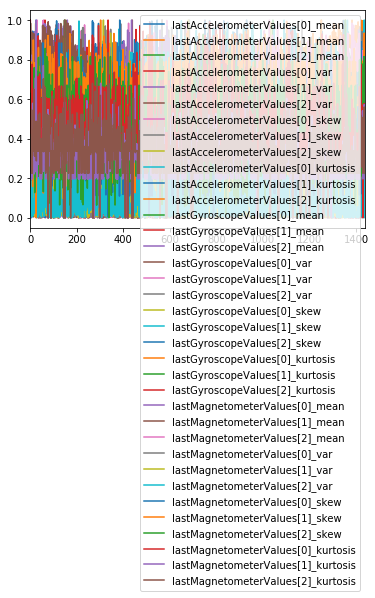

In [122]:
x.plot()
plt.show()

In [117]:
df=normalize(df1)

In [120]:
x.plot()
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'